In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("./AB_NYC_2019.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.drop(['id' , 'name' , 'host_id' , 'host_name' , 'last_review' ,'reviews_per_month' , 'calculated_host_listings_count' , 'availability_365'] , axis = 1,inplace = None)


<AxesSubplot: xlabel='neighbourhood', ylabel='price per night'>

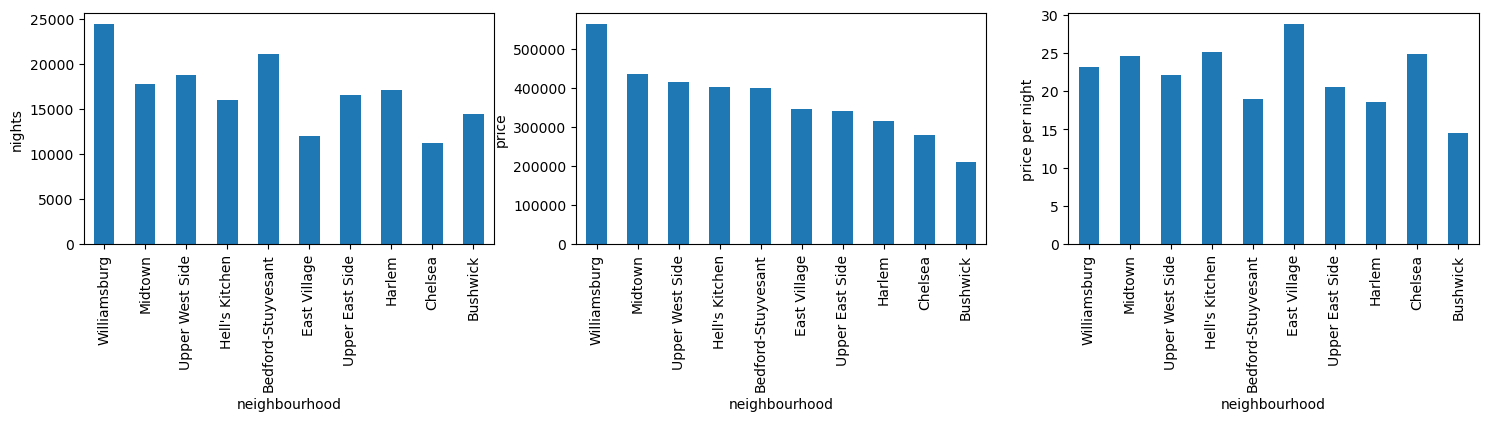

In [108]:
tempdata = data.groupby("neighbourhood")[["minimum_nights" , "price"]].sum()
tempdata.sort_values(by='price' , ascending=False , inplace = True)
tempdata = tempdata[:10]
temp = tempdata["price"] / tempdata["minimum_nights"]
temp = temp.rename('price_per_night')
tempdata = pd.concat([tempdata,  temp] , axis = 1)

fig=plt.figure(3,figsize=(18,3))

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)


tempdata.minimum_nights.plot(kind = 'bar',ax=ax1,ylabel='nights')
tempdata.price.plot(kind = 'bar',ax=ax2 , ylabel = 'price')
tempdata.price_per_night.plot(kind = 'bar' , ax=ax3,ylabel = 'price per night')


<AxesSubplot: xlabel='minimum_nights'>

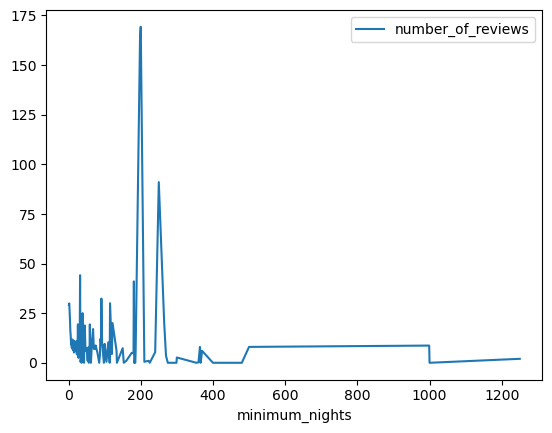

In [111]:
tempdata = data.groupby('minimum_nights')[['number_of_reviews']].mean()
tempdata.plot()

<AxesSubplot: xlabel='minimum_nights'>

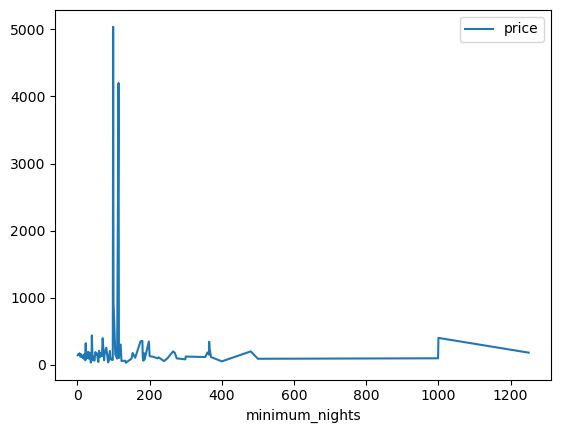

In [115]:
tempdata = data.groupby('minimum_nights')[['price']].mean()
tempdata.plot()

<AxesSubplot: xlabel='price'>

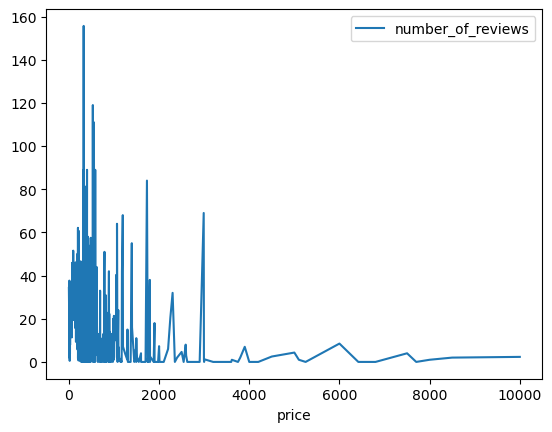

In [116]:
tempdata = data.groupby('price')[['number_of_reviews']].mean()
tempdata.plot()